In [82]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from collections import Counter

* The purpose of the project is check the history of the lottery over 10 years.


* Find the sequence of balls received the most .


* Run randomly 1044 lotteries (as the number of lotteries in the database) and get statidtically the best ball sequence .


* The data were take from a israeli lottery web site ('https://lottosheli.co.il/results/lotto').


* The Israeli lottery consists of six balls(number 1-37) and another "strong" ball(numbers 1-7).

In [83]:
lotto=pd.read_csv('lotto1.csv')

In [84]:
lotto.head()

,one,two,three,four,five,six,strong
0,6,14,17,22,24,33,1
1,1,9,17,22,33,36,1
2,2,9,11,13,35,37,2
3,12,24,25,28,34,37,3
4,5,12,14,16,17,24,2


#### The number that appeared the most in each ball in the lottery in percent .

In [85]:
for col in lotto.columns:
    print('-' * 37 + col + '-' * 37 , end=' - ')
    display(lotto[col].value_counts(normalize=True).head(37))

-------------------------------------one------------------------------------- - 

1     0.176077
2     0.130144
3     0.119617
4     0.096651
5     0.088995
6     0.073684
7     0.062201
8     0.048804
9     0.036364
11    0.034450
12    0.027751
10    0.026794
13    0.017225
15    0.012440
14    0.011483
17    0.008612
16    0.007656
18    0.006699
20    0.006699
19    0.003828
22    0.001914
23    0.000957
24    0.000957
Name: one, dtype: float64

-------------------------------------two------------------------------------- - 

8     0.089952
6     0.080383
9     0.072727
13    0.068900
10    0.067943
11    0.059330
7     0.057416
5     0.056459
12    0.050718
15    0.044976
3     0.044019
16    0.041148
4     0.038278
14    0.031579
20    0.029665
19    0.029665
17    0.027751
2     0.025837
18    0.023923
21    0.022967
22    0.013397
25    0.005742
23    0.004785
24    0.004785
26    0.002871
27    0.002871
28    0.000957
32    0.000957
Name: two, dtype: float64

-------------------------------------three------------------------------------- - 

11    0.063158
12    0.060287
14    0.060287
17    0.059330
15    0.057416
10    0.056459
18    0.055502
21    0.050718
16    0.048804
13    0.047847
22    0.046890
19    0.044019
20    0.042105
9     0.036364
25    0.034450
26    0.028708
23    0.027751
7     0.024880
8     0.023923
24    0.023923
27    0.020096
28    0.017225
6     0.016268
5     0.015311
29    0.011483
4     0.007656
3     0.006699
30    0.006699
31    0.001914
32    0.001914
33    0.000957
34    0.000957
Name: three, dtype: float64

-------------------------------------four------------------------------------- - 

23    0.066986
22    0.063158
24    0.062201
25    0.058373
20    0.055502
27    0.053589
21    0.052632
18    0.051675
19    0.049761
17    0.048804
26    0.045933
28    0.044019
30    0.041148
16    0.038278
29    0.035407
31    0.032536
13    0.028708
12    0.028708
15    0.027751
14    0.027751
11    0.019139
32    0.012440
34    0.011483
10    0.011483
33    0.009569
9     0.009569
8     0.005742
7     0.002871
35    0.001914
6     0.000957
5     0.000957
4     0.000957
Name: four, dtype: float64

-------------------------------------five------------------------------------- - 

32    0.072727
26    0.072727
28    0.071770
29    0.069856
25    0.066029
30    0.065072
27    0.065072
31    0.055502
34    0.053589
33    0.053589
35    0.048804
24    0.047847
23    0.045933
22    0.033493
20    0.032536
21    0.030622
36    0.022967
18    0.019139
19    0.018182
17    0.016268
16    0.013397
15    0.008612
12    0.005742
14    0.003828
13    0.001914
11    0.001914
10    0.000957
9     0.000957
7     0.000957
Name: five, dtype: float64

-------------------------------------six------------------------------------- - 

37    0.172249
36    0.132057
35    0.115789
34    0.095694
33    0.094737
32    0.064115
29    0.062201
31    0.056459
30    0.048804
28    0.035407
26    0.029665
27    0.022967
25    0.021053
22    0.012440
24    0.007656
23    0.007656
21    0.006699
20    0.003828
18    0.002871
17    0.002871
16    0.001914
19    0.000957
15    0.000957
13    0.000957
Name: six, dtype: float64

-------------------------------------strong------------------------------------- - 

3    0.159809
6    0.154067
5    0.142584
1    0.140670
2    0.139713
4    0.132057
7    0.131100
Name: strong, dtype: float64

#### The number that appeared the most in each ball in the lottery in quantity .

In [86]:
for col in lotto.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(lotto[col].value_counts().head(40))

----------------------------------------one---------------------------------------- - 

1     184
2     136
3     125
4     101
5      93
6      77
7      65
8      51
9      38
11     36
12     29
10     28
13     18
15     13
14     12
17      9
16      8
18      7
20      7
19      4
22      2
23      1
24      1
Name: one, dtype: int64

----------------------------------------two---------------------------------------- - 

8     94
6     84
9     76
13    72
10    71
11    62
7     60
5     59
12    53
15    47
3     46
16    43
4     40
14    33
20    31
19    31
17    29
2     27
18    25
21    24
22    14
25     6
23     5
24     5
26     3
27     3
28     1
32     1
Name: two, dtype: int64

----------------------------------------three---------------------------------------- - 

11    66
12    63
14    63
17    62
15    60
10    59
18    58
21    53
16    51
13    50
22    49
19    46
20    44
9     38
25    36
26    30
23    29
7     26
8     25
24    25
27    21
28    18
6     17
5     16
29    12
4      8
3      7
30     7
31     2
32     2
33     1
34     1
Name: three, dtype: int64

----------------------------------------four---------------------------------------- - 

23    70
22    66
24    65
25    61
20    58
27    56
21    55
18    54
19    52
17    51
26    48
28    46
30    43
16    40
29    37
31    34
13    30
12    30
15    29
14    29
11    20
32    13
34    12
10    12
33    10
9     10
8      6
7      3
35     2
6      1
5      1
4      1
Name: four, dtype: int64

----------------------------------------five---------------------------------------- - 

32    76
26    76
28    75
29    73
25    69
30    68
27    68
31    58
34    56
33    56
35    51
24    50
23    48
22    35
20    34
21    32
36    24
18    20
19    19
17    17
16    14
15     9
12     6
14     4
13     2
11     2
10     1
9      1
7      1
Name: five, dtype: int64

----------------------------------------six---------------------------------------- - 

37    180
36    138
35    121
34    100
33     99
32     67
29     65
31     59
30     51
28     37
26     31
27     24
25     22
22     13
24      8
23      8
21      7
20      4
18      3
17      3
16      2
19      1
15      1
13      1
Name: six, dtype: int64

----------------------------------------strong---------------------------------------- - 

3    167
6    161
5    149
1    147
2    146
4    138
7    137
Name: strong, dtype: int64

#### The unique numbers that came out in each ball in the lottery .

In [21]:
n = lotto.nunique(axis=0)

print("No.of.unique values in each column :\n", 
      n)

No.of.unique values in each column :
 one       23
two       28
three     32
four      32
five      29
six       24
strong     7
dtype: int64


In [25]:
lotto

,one,two,three,four,five,six,strong
0,6,14,17,22,24,33,1
1,1,9,17,22,33,36,1
2,2,9,11,13,35,37,2
3,12,24,25,28,34,37,3
4,5,12,14,16,17,24,2
...,...,...,...,...,...,...,...
1040,7,11,17,21,23,37,2
1041,1,2,9,21,22,36,3
1042,3,11,15,17,22,23,1
1043,1,6,19,23,33,37,3


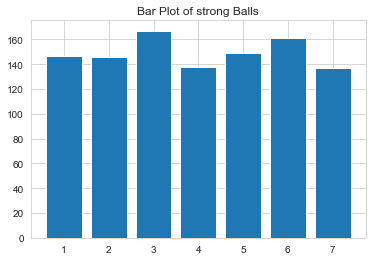

In [27]:
keys = []
values = []
for key, value in frequency_strong.iteritems():
    keys.append(key)
    values.append(value)
plt.bar(keys, values)
plt.title('Bar Plot of strong Balls')
plt.show()

### The amount of each number came out in the lottery . 

In [28]:
balls = lotto[['one', 'two', 'three', 'four', 'five','six']].values.flatten()
unique, counts = np.unique(balls, return_counts=True)
percentages = counts/counts.sum() 
perc_cumsum = np.cumsum(percentages)

In [29]:
print(np.asarray((unique, counts)).T)

[[  1 184]
 [  2 163]
 [  3 178]
 [  4 150]
 [  5 169]
 [  6 179]
 [  7 155]
 [  8 176]
 [  9 163]
 [ 10 171]
 [ 11 186]
 [ 12 181]
 [ 13 173]
 [ 14 141]
 [ 15 159]
 [ 16 158]
 [ 17 171]
 [ 18 167]
 [ 19 153]
 [ 20 178]
 [ 21 171]
 [ 22 179]
 [ 23 161]
 [ 24 154]
 [ 25 194]
 [ 26 188]
 [ 27 172]
 [ 28 177]
 [ 29 187]
 [ 30 169]
 [ 31 153]
 [ 32 159]
 [ 33 166]
 [ 34 169]
 [ 35 174]
 [ 36 162]
 [ 37 180]]


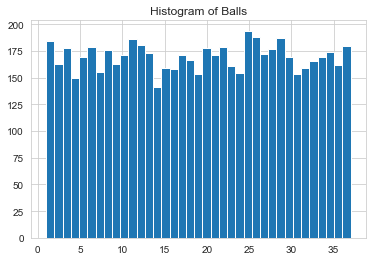

In [87]:
plt.hist(balls, bins = 37)
plt.title('Histogram of Balls')
plt.show()

## Generate lottery numbers

In [51]:
from random import random

def lottery_generate (previous_data = lotto):
    balls = previous_data[['one', 'two', 'three', 'four', 'five','six']].values.flatten()
    
    unique, counts = np.unique(balls, return_counts=True)

    list_numbers = []
    for iteration in range(6):
        percentages = counts/counts.sum() 
        perc_cumsum = np.cumsum(percentages)
        # Generate a random number from uniform:
        rand_unif = random()
        # Finding an index and the number itself from our discrete distribution
        if len(np.where(perc_cumsum < rand_unif)[0])>0:
            index = np.where(perc_cumsum < rand_unif)[0][-1] +1
        else:
            index = 0
        number = unique[index]
        list_numbers.append(number)
        # removing the previuous number from counts
        counts = np.delete(counts, index)
        unique = np.delete(unique, index)
    
    list_numbers.sort()
    
    unique, counts = np.unique(lotto.strong.values, return_counts=True)
    percentages = counts/counts.sum() 
    perc_cumsum = np.cumsum(percentages)
    # Generate a random number from uniform:
    rand_unif = random()
    # Finding an index and the number itself from our discrete distribution
    if len(np.where(perc_cumsum < rand_unif)[0])>0:
        index = np.where(perc_cumsum < rand_unif)[0][-1] +1
    else:
        index = 0
    megaball = unique[index]
        
    return [list_numbers, megaball]

In [52]:
from random import seed
seed(1044)
for i in range(5):
    print(lottery_generate())

[[13, 17, 27, 28, 30, 31], 7]
[[1, 17, 20, 26, 33, 37], 3]
[[2, 8, 12, 13, 17, 27], 4]
[[7, 10, 11, 25, 29, 35], 5]
[[9, 11, 15, 16, 23, 34], 5]
